# Численные методы решения дифференциальных уравнений с частными производными.

In [1]:
import math

import matplotlib.cm
import matplotlib.pyplot as plt
import numpy as np

Вспомогательные константы и функции

In [2]:
! make solver

make: 'solver' is up to date.


In [3]:
EPS = 1e-9


def neq(x, y):
    return True if np.abs(x - y) > EPS else False


def write_arr(file, arr):
    file.write(" ".join(str(elem) for elem in arr) + "\n")

### Ввод данных

Испольуземый численный метод

* $\mu = 1$ - метод простых итерации (метод Либмана)
* $\mu = 2$ - метод Зейделя
* $\mu = 3$ - метод простых итерации с релаксацией

In [4]:
mu = 2

Параметр релаксации

* $\omega < 1$ - нижняя релаксация
* $\omega < 2$ - верхняя релаксация

In [5]:
omega = 1.5

Ограничения по $x$ и $y$, параметр сетки.

$x \in [0, L_x]$, $y \in [0, L_y]$

In [6]:
Lx = np.pi / 2
Ly = np.pi / 2
n = 15
m = 15

Коэффициенты уравнения

In [7]:
a = 1
b = 0
c = 1
d = 2
e = 0
f = 3
g = 0

Коэффициенты в граничных условиях

In [8]:
alpha_0y = 0
beta_0y = 1

alpha_Ly = 0
beta_Ly = 1

alpha_x0 = 0
beta_x0 = 1

alpha_xL = 0
beta_xL = 1

Граничные условия

In [9]:
def gamma_0y(y):
    return np.cos(y)


def gamma_Ly(y):
    return 0


def gamma_x0(x):
    return np.exp(-x) * np.cos(x)


def gamma_xL(x):
    return 0

Точное решение

In [10]:
def true_u(x, y):
    return np.exp(-x) * np.cos(x) * np.cos(y)

### Препроцессинг

Вычисление шагов $h_x$ и $h_y$

In [11]:
hx = Lx / (n - 1)
hy = Ly / (m - 1)

Генерация узлов сетки

In [12]:
x = [i * hx for i in range(n - 1)]
x.append(Lx)
x = np.array(x)

y = [j * hy for j in range(m - 1)]
y.append(Ly)
y = np.array(y)

Генерация начальных условий для решателя

In [13]:
bound_x0 = []
bound_xL = []

for i in range(n):
    bound_x0.append(gamma_x0(x[i]))
    bound_xL.append(gamma_xL(x[i]))

bound_0y = []
bound_Ly = []

for j in range(m):
    bound_0y.append(gamma_0y(y[j]))
    bound_Ly.append(gamma_Ly(y[j]))

with open("in.txt", "w") as file_in:
    write_arr(file_in, [n, m, mu, omega])
    write_arr(file_in, [hx, hy])
    write_arr(file_in, [a, b, c, d, e, f, g])
    write_arr(file_in, [alpha_0y, alpha_Ly, alpha_x0, alpha_xL])
    write_arr(file_in, [beta_0y, beta_Ly, beta_x0, beta_xL])
    write_arr(file_in, bound_x0)
    write_arr(file_in, bound_xL)
    write_arr(file_in, bound_0y)
    write_arr(file_in, bound_Ly)

### Решение

In [14]:
! ./solver < in.txt > out.txt

### Постпроцессинг

In [15]:
data = []
iters = -1

with open("out.txt", "r") as file_out:
    iters = int(file_out.readline())
    for _ in range(n):
        file_line = file_out.readline()
        data_line = [float(elem) for elem in file_line.split()]
        data.append(data_line)

data = np.array(data).T

### Визуализация

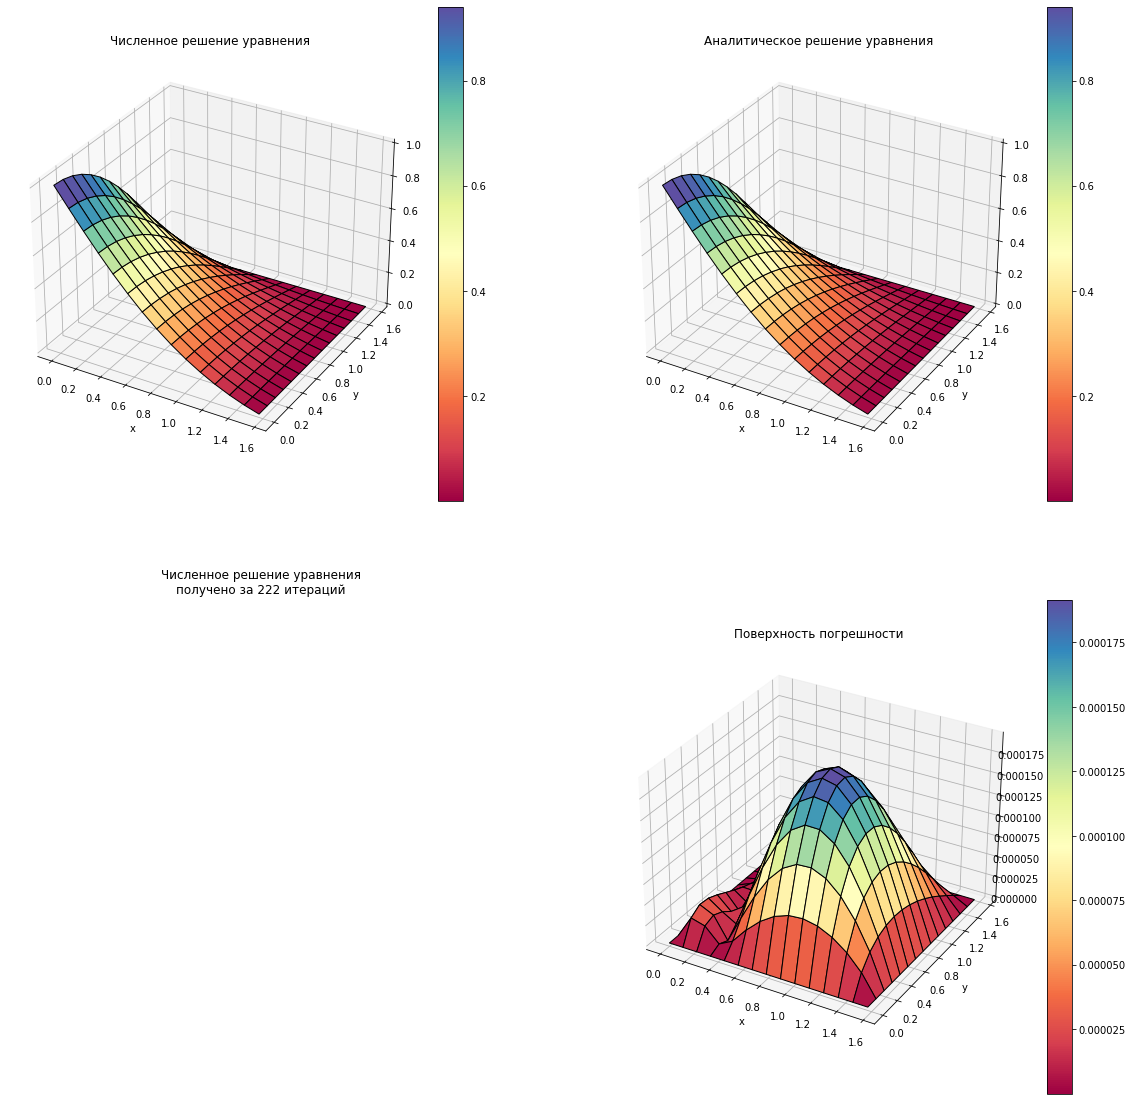

In [16]:
def subplot3d(ind, figure, _x, _y, _z):
    axes = figure.add_subplot(ind, projection="3d")
    surface = axes.plot_surface(
        _x,
        _y,
        _z,
        edgecolors=["black"],
        linewidth=1,
        cmap=matplotlib.cm.Spectral,
        shade=True,
        antialiased=True,
    )
    figure.colorbar(surface)


figure = plt.figure(figsize=(20, 20))
x_plt, y_plt = np.meshgrid(x, y)
true_data = true_u(x_plt, y_plt)
delta = np.abs(data - true_data)

subplot3d(221, figure, x_plt, y_plt, data)
plt.title("Численное решение уравнения")
plt.xlabel("x")
plt.ylabel("y")

subplot3d(222, figure, x_plt, y_plt, true_data)
plt.title("Аналитическое решение уравнения")
plt.xlabel("x")
plt.ylabel("y")

axes = figure.add_subplot(223)
plt.title("Численное решение уравнения\nполучено за " + str(iters) + " итераций")
plt.axis("off")

subplot3d(224, figure, x_plt, y_plt, delta)
plt.title("Поверхность погрешности")
plt.xlabel("x")
plt.ylabel("y")

plt.show()